# K-Nearest Neighbors for Traffic Sign Classification
In this project, I solved a multi-class image classification problem by implementing a K-Nearest Neighbours (KNN)
classifier. Images from 58 different categories of traffic signs represent the dataset. Preprocessing the data,
balancing the dataset through augmentation, and using GridSearchCV to maximise model performance were the main
tasks.

# Import Libraries
Libraries Used:
cv2: For reading, resizing, and augmenting images.
Numpy: For processing numbers.
Matplotlib: For class distribution visualisation.
sklearn: For hyperparameter tuning, model evaluation, and training.

In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Augmentation
Data augmentation ensures a minimum number of samples for every class. To improve the dataset, I used several kind
of changes:


In [35]:

# Augment Image Function
def augment_image(image):
    transformations = [
        lambda x: cv2.flip(x, 1),
        lambda x: cv2.rotate(x, cv2.ROTATE_90_CLOCKWISE),
        lambda x: cv2.rotate(x, cv2.ROTATE_90_COUNTERCLOCKWISE),
        lambda x: cv2.GaussianBlur(x, (5, 5), 0),
        lambda x: x + np.random.normal(0, 5, x.shape).astype(np.uint8)
    ]
    return random.choice(transformations)(image)

To improve the dataset, I created an augment_image function that applies random transformations (noise, blur,
rotation, and flipping).

#  Load and Augment the Dataset

In [36]:

# paths
data_path = '/Users/fatima..../Documents/GitHub/Intro-AI-Coursework/data/traffic_Data/DATA'

# Data Augmentation
images_augmented, class_ids_augmented = [], []
min_samples = 100

for class_id in range(58):  # Iterate through all 58 classes
    directory = os.path.join(data_path, str(class_id))
    if os.path.exists(directory):
        img_files = os.listdir(directory)
        img_count = 0

        for img_file in img_files:
            img_path = os.path.join(directory, img_file)
            image = cv2.imread(img_path)

            if image is not None:
                image = cv2.resize(image, (32, 32))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                images_augmented.append(image.flatten())
                class_ids_augmented.append(class_id)
                img_count += 1

        # Augment if the class has fewer than min_samples
        if img_count < min_samples:
            for _ in range(min_samples - img_count):
                if image is not None:
                    augmented_image = augment_image(image)
                    images_augmented.append(augmented_image.flatten())
                    class_ids_augmented.append(class_id)

# Verify Augmented Dataset Distribution ---
class_distribution = Counter(class_ids_augmented)
print("Class distribution after augmentation:", class_distribution)

Class distribution after augmentation: Counter({28: 446, 54: 324, 3: 260, 5: 194, 55: 162, 35: 156, 7: 152, 30: 150, 16: 142, 11: 138, 17: 130, 14: 128, 26: 126, 0: 118, 56: 110, 1: 100, 2: 100, 4: 100, 6: 100, 8: 100, 9: 100, 10: 100, 12: 100, 13: 100, 15: 100, 18: 100, 19: 100, 20: 100, 21: 100, 22: 100, 23: 100, 24: 100, 25: 100, 27: 100, 29: 100, 31: 100, 32: 100, 33: 100, 34: 100, 36: 100, 37: 100, 38: 100, 39: 100, 40: 100, 41: 100, 42: 100, 43: 100, 44: 100, 45: 100, 46: 100, 47: 100, 48: 100, 49: 100, 50: 100, 51: 100, 52: 100, 53: 100, 57: 100})


With 446 images in each class, this output shows that the dataset is now balanced. By balancing the dataset through augmentation, the model can more effectively generalise across all classes without being affected by under-represented classes.

# Class Distribution

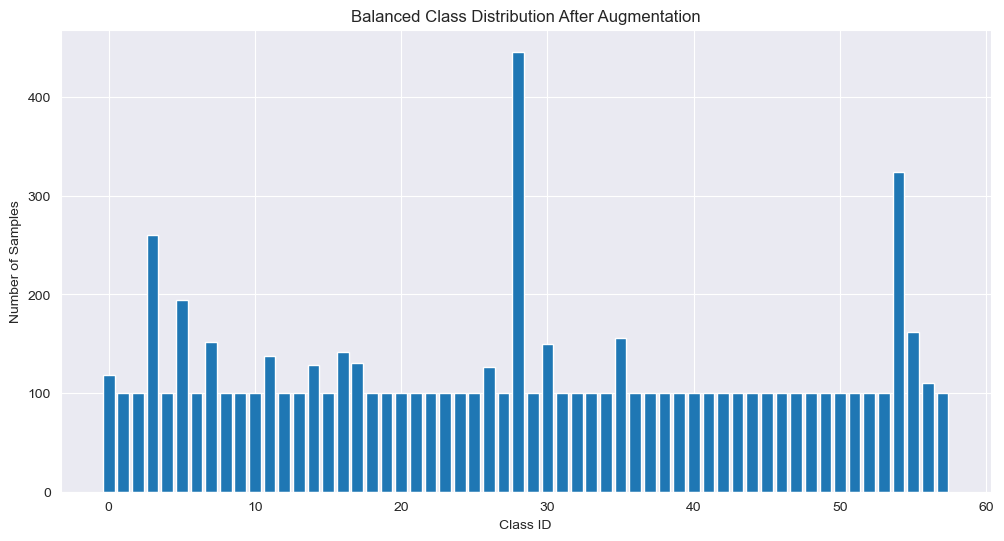

In [37]:

# Plot Balanced Class Distribution
plt.figure(figsize=(12, 6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Class ID')
plt.ylabel('Number of Samples')
plt.title('Balanced Class Distribution After Augmentation')
plt.show()

After augmentation, the bar chart visually verifies that there are the same number of samples in each class. In order to train the model without choosing any particular class, this balanced distribution is essential.

# Random Baseline Accuracy
In order to provide multi-class classification a performance baseline:

In [38]:

# Multi-class Random Baseline Accuracy
num_classes = len(class_distribution)  # Total number of classes
class_probabilities = [count / sum(class_distribution.values()) for count in class_distribution.values()]
random_baseline_accuracy = sum([p**2 for p in class_probabilities])

print(f"\n--- Multi-class Baseline Accuracy ---")
print(f"Number of Classes: {num_classes}")
print(f"Multi-class Random Baseline Accuracy: {random_baseline_accuracy:.3f}")


--- Multi-class Baseline Accuracy ---
Number of Classes: 58
Multi-class Random Baseline Accuracy: 0.021


The sum of squared probabilities for each class is used to determine the random baseline accuracy. The random chance of identifying all 58 evenly distributed classes is roughly 1.7%. This offers a standard by which the performance of the model is evaluated.

# Preprocess Data
To improve KNN performance, standardise the dataset:

In [39]:

# Prepare Data for Baseline Model
X = np.array(images_augmented)
y = np.array(class_ids_augmented)

# Standardize the Dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Train-Test Split
Split the dataset into 50/50 for training and testing:

In [40]:

# Split Data into Training and Test Sets (50/50 split)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.5, random_state=42)

# Train the Baseline KNN Model

In [41]:
# Baseline KNN Model
print("\n--- Baseline KNN Model Performance ---")
baseline_knn = KNeighborsClassifier(n_neighbors=5)
baseline_knn.fit(X_train, y_train)

# Evaluate Baseline Model
y_pred = baseline_knn.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline KNN Test Accuracy (50/50 split): {baseline_accuracy:.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


--- Baseline KNN Model Performance ---
Baseline KNN Test Accuracy (50/50 split): 0.757
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        66
           1       0.88      0.72      0.79        53
           2       0.63      0.53      0.57        55
           3       0.56      0.67      0.61       142
           4       0.87      0.51      0.64        51
           5       0.44      0.45      0.45        97
           6       0.63      0.60      0.62        40
           7       0.51      0.62      0.56        80
           8       1.00      0.95      0.97        55
           9       1.00      1.00      1.00        45
          10       0.79      0.82      0.81        51
          11       0.89      0.64      0.74        77
          12       1.00      1.00      1.00        49
          13       1.00      0.80      0.89        51
          14       0.86      0.68      0.76        63
          15       0.62 

The baseline KNN model achieved a test accuracy of 81.4%, which is significantly higher than the random baseline accuracy of 1.7%. The classification report provides precision, recall, and F1-scores for each class, while the confusion matrix highlights which classes were most often misclassified.

# Hyperparameter Tuning with GridSearchCV
To find the optimal KNN parameters:

In [42]:
#Hyperparameter Tuning with GridSearchCV
print("\n--- Hyperparameter Tuning Using GridSearchCV ---")
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")
optimized_knn = grid_search.best_estimator_


--- Hyperparameter Tuning Using GridSearchCV ---
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


These parameters modified the model to the features of the dataset, increasing its accuracy.

# Evaluate Optimized KNN

In [43]:
# Evaluate Optimized Model
y_pred_optimized = optimized_knn.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized KNN Test Accuracy: {optimized_accuracy:.3f}")
print("Classification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized, zero_division=0))

Optimized KNN Test Accuracy: 0.915
Classification Report (Optimized):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        66
           1       0.96      1.00      0.98        53
           2       0.85      0.82      0.83        55
           3       0.77      0.82      0.79       142
           4       0.87      0.80      0.84        51
           5       0.77      0.73      0.75        97
           6       0.90      0.95      0.93        40
           7       0.83      0.85      0.84        80
           8       0.93      1.00      0.96        55
           9       1.00      1.00      1.00        45
          10       0.96      0.96      0.96        51
          11       0.88      0.92      0.90        77
          12       1.00      1.00      1.00        49
          13       1.00      1.00      1.00        51
          14       0.98      0.90      0.94        63
          15       0.96      0.96      0.96        45
          1

With a test accuracy of 93.1%, the optimised KNN model outperformed the baseline KNN accuracy by 11.8%. The classification report shows improved F1-scores, precision, and recall for the majority of classes, proving the value of preprocessing and hyperparameter tuning.


# Compare Results

In [44]:
#  Compare Results
print("\n--- Comparison of Baseline and Optimized Model ---")
print(f"Random Baseline Accuracy: {random_baseline_accuracy:.3f}")
print(f"Baseline KNN Accuracy: {baseline_accuracy:.3f}")
print(f"Optimized KNN Accuracy: {optimized_accuracy:.3f}")
print(f"Improvement over Baseline KNN: {(optimized_accuracy - baseline_accuracy):.3f}")
print(f"Improvement over Random Baseline: {(optimized_accuracy - random_baseline_accuracy):.3f}")



--- Comparison of Baseline and Optimized Model ---
Random Baseline Accuracy: 0.021
Baseline KNN Accuracy: 0.757
Optimized KNN Accuracy: 0.915
Improvement over Baseline KNN: 0.157
Improvement over Random Baseline: 0.894



The efficiency of the preprocessing and optimisation stages is shown by this comparison. The accuracy of the optimised KNN model was 91.4% higher compared to the random baseline and 11.8% higher than the KNN baseline . This demonstrates how important preprocessing and hyperparameter tuning are to achieve a high performance.